In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,15.6,127,2.80,NaN,0.28,NaN,NaN,1.04,NaN,NaN
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,NaN,2.50,16.8,113,NaN,3.49,0.24,NaN,7.80,NaN,NaN,NaN
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,NaN,120,NaN,0.69,0.43,NaN,NaN,NaN,NaN,835.0
176,13.17,NaN,2.37,20.0,120,NaN,0.68,0.53,NaN,9.30,NaN,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	31
float64		column 3	0
float64		column 4	30
int64		column 5	0
float64		column 6	61
float64		column 7	30
float64		column 8	15
float64		column 9	61
float64		column 10	60
float64		column 11	61
float64		column 12	61
float64		column 13	31


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,163.000000,147.000000,178.000000,148.000000,178.000000,117.000000,148.000000,163.000000,117.000000,118.000000,117.000000,117.000000,147.000000
mean,12.990061,2.350000,2.366517,19.457432,99.741573,2.274530,2.000135,0.361227,1.574444,5.123475,0.972957,2.572479,730.904762
std,0.792223,1.124011,0.274344,3.317878,14.282484,0.588501,1.012392,0.125343,0.555430,2.217947,0.222981,0.716726,297.823137
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.420000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.605000,2.210000,17.175000,88.000000,1.790000,1.072500,0.270000,1.250000,3.312500,0.820000,1.860000,495.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.200000,2.120000,0.340000,1.530000,5.000000,1.010000,2.770000,660.000000
75%,13.625000,3.065000,2.557500,21.500000,107.000000,2.800000,2.882500,0.435000,1.950000,6.175000,1.120000,3.170000,928.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,10.800000,1.710000,3.820000,1547.000000


<AxesSubplot:>

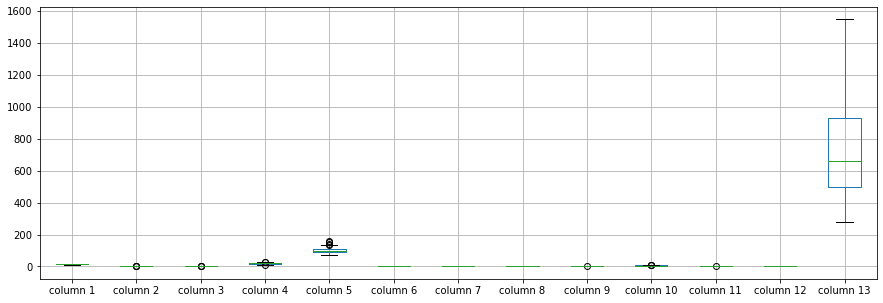

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.990061
column 2       2.350000
column 3       2.366517
column 4      19.457432
column 5      99.741573
column 6       2.274530
column 7       2.000135
column 8       0.361227
column 9       1.574444
column 10      5.123475
column 11      0.972957
column 12      2.572479
column 13    730.904762
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.097221,0.212912,-0.294348,0.252837,0.283472,0.203665,-0.198262,0.056270,0.545003,-0.134444,0.035506,0.619032
column 2,0.097221,1.000000,0.162666,0.330942,-0.140549,-0.336533,-0.427882,0.288131,-0.284697,0.251824,-0.542446,-0.375057,-0.244953
column 3,0.212912,0.162666,1.000000,0.429644,0.286587,0.107686,0.131504,0.177555,-0.084211,0.226882,-0.062791,0.011056,0.223287
column 4,-0.294348,0.330942,0.429644,1.000000,-0.087848,-0.361800,-0.375852,0.333244,-0.214443,0.014284,-0.268564,-0.276305,-0.420910
column 5,0.252837,-0.140549,0.286587,-0.087848,1.000000,0.253688,0.202182,-0.251942,0.194297,0.251672,0.165299,0.084847,0.399861
column 6,0.283472,-0.336533,0.107686,-0.361800,0.253688,1.000000,0.896455,-0.505940,0.614609,-0.154942,0.459315,0.725569,0.544564
column 7,0.203665,-0.427882,0.131504,-0.375852,0.202182,0.896455,1.000000,-0.535333,0.653905,-0.217092,0.590687,0.795140,0.437450
column 8,-0.198262,0.288131,0.177555,0.333244,-0.251942,-0.505940,-0.535333,1.000000,-0.448977,0.076947,-0.258254,-0.502626,-0.376501
column 9,0.056270,-0.284697,-0.084211,-0.214443,0.194297,0.614609,0.653905,-0.448977,1.000000,-0.113690,0.391963,0.571676,0.351046
column 10,0.545003,0.251824,0.226882,0.014284,0.251672,-0.154942,-0.217092,0.076947,-0.113690,1.000000,-0.552140,-0.504942,0.214488


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+45,13+45+45,13+45+45,13+45+45+45+45,13+45+45+45+45+45,13+45+45+45+45+45+45,13+45+45+45+45+45,13+45+45+45+45,13+45+45+45,13+45+45,13+45,13], vae_layer = False, seed = 450)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 797.7050281871449
Epoch: 1 , loss: 785.3850042169744
Epoch: 2 , loss: 791.2709628018466
Epoch: 3 , loss: 791.5414872602983
Epoch: 4 , loss: 792.9397860440341
Epoch: 5 , loss: 795.0691417347301
Epoch: 6 , loss: 795.0088168057529
Epoch: 7 , loss: 794.2893121892756
Epoch: 8 , loss: 790.5920465642756
Epoch: 9 , loss: 788.6419289328835
Epoch: 10 , loss: 789.296708540483
Epoch: 11 , loss: 793.0055486505681
Epoch: 12 , loss: 789.3360096324574
Epoch: 13 , loss: 791.8917069868608
Epoch: 14 , loss: 794.2927024147727
Epoch: 15 , loss: 794.9102949662642
Epoch: 16 , loss: 792.6011297052556
Epoch: 17 , loss: 792.6512950550426
Epoch: 18 , loss: 797.9641335227273
Epoch: 19 , loss: 795.6103071732955
Epoch: 20 , loss: 795.7938953746449
Epoch: 21 , loss: 787.0771706321023
Epoch: 22 , loss: 788.6492697975852
Epoch: 23 , loss: 792.911787553267
Epoch: 24 , loss: 791.6238125887784
Epoch: 25 , loss: 786.5404663085938
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-7.760095,0.000000,0.0,0.000000,0,0.000000,-2.136141,0.0,-1.441659,-2.030258,0.000000,-2.471966,-715.384216
1,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,-1.899978,0.0,0.000000,0,-2.992189,0.000000,0.0,-1.642709,0.000000,-0.513224,-1.924201,-1292.978851
4,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
174,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
175,0.000000,0.000000,0.0,-13.689548,0,-0.813393,0.000000,0.0,-0.811260,-8.257121,-0.121472,-0.715161,0.000000
176,0.000000,-1.640430,0.0,0.000000,0,-0.433880,0.000000,0.0,-0.697635,0.000000,0.038193,-0.544531,-587.399048


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3602.4842314656253, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.33056142753412104

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,6.469905,1.710000,2.43,15.600000,127,2.800000,0.923859,0.28,0.848341,3.609742,1.040000,1.448034,349.615784
1,13.200000,1.780000,2.14,11.200000,100,2.650000,2.760000,0.26,1.280000,4.380000,1.050000,3.400000,1050.000000
2,13.160000,2.360000,2.67,18.600000,101,2.800000,3.240000,0.30,2.810000,5.680000,1.030000,3.170000,1185.000000
3,14.370000,0.050022,2.50,16.800000,113,0.857811,3.490000,0.24,0.537291,7.800000,0.346776,1.525799,187.021149
4,13.240000,2.590000,2.87,21.000000,118,2.800000,2.690000,0.39,1.820000,4.320000,1.040000,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.500000,95,1.680000,0.610000,0.52,1.060000,7.700000,0.640000,1.740000,740.000000
174,13.400000,3.910000,2.48,23.000000,102,1.800000,0.750000,0.43,1.410000,7.300000,0.700000,1.560000,750.000000
175,13.270000,4.280000,2.26,6.310452,120,0.776607,0.690000,0.43,0.538740,1.942879,0.468528,0.844839,835.000000
176,13.170000,0.949570,2.37,20.000000,120,1.216120,0.680000,0.53,0.762365,9.300000,0.638193,1.075469,252.600952


In [20]:
imputations[-1].to_excel("Wine_AG_20(imp).xlsx", index=False, header=False)